# Imports

In [5]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from PIL import Image
from keras.optimizers import RMSprop

# Image preprocessing

In [6]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [13]:
batch_size = 16 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  
valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  


Found 4554 images belonging to 51 classes.
Found 3492 images belonging to 51 classes.


# Creating a model

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200,200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #third block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #fourth block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropping out some data
model.add(Dense(51))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)        18496     
__________

In [15]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Training

In [16]:
model.fit_generator(train_set,
                    steps_per_epoch = 4554//16, #1000/32 numbers of batches per epoch
                    epochs = 30,
                    validation_data = valid_set,
                    validation_steps = 3492//32 )
                   
        
                 

Epoch 1/30
284/284 [==============================] - 391s 1s/step - loss: 3.2454 - acc: 0.2707 - val_loss: 2.5755 - val_acc: 0.4146
Epoch 2/30
284/284 [==============================] - 390s 1s/step - loss: 2.4360 - acc: 0.4261 - val_loss: 2.0441 - val_acc: 0.5011
Epoch 3/30
284/284 [==============================] - 340s 1s/step - loss: 2.0939 - acc: 0.4902 - val_loss: 1.7354 - val_acc: 0.5831
Epoch 4/30
284/284 [==============================] - 344s 1s/step - loss: 1.8840 - acc: 0.5331 - val_loss: 1.6509 - val_acc: 0.5946
Epoch 5/30
284/284 [==============================] - 347s 1s/step - loss: 1.7106 - acc: 0.5706 - val_loss: 1.2427 - val_acc: 0.6726
Epoch 6/30
284/284 [==============================] - 349s 1s/step - loss: 1.5747 - acc: 0.5969 - val_loss: 1.2484 - val_acc: 0.6737
Epoch 7/30
284/284 [==============================] - 366s 1s/step - loss: 1.4776 - acc: 0.6148 - val_loss: 1.0625 - val_acc: 0.7309
Epoch 8/30
284/284 [==============================] - 384s 1s/step - 

In [26]:
#model.save("models/model_200x200.h5")
tfjs.converters.save_keras_model(model, './models/model_half.json')
print("Saved")

Saved


In [17]:
valid_set.class_indices

{'Faces': 0,
 'Leopards': 1,
 'Motorbikes': 2,
 'accordion': 3,
 'barrel': 4,
 'binocular': 5,
 'buddha': 6,
 'butterfly': 7,
 'camera': 8,
 'cougar_body': 9,
 'cougar_face': 10,
 'crab': 11,
 'crayfish': 12,
 'crocodile': 13,
 'dalmatian': 14,
 'grand_piano': 15,
 'hawksbill': 16,
 'headphone': 17,
 'hedgehog': 18,
 'helicopter': 19,
 'ibis': 20,
 'inline_skate': 21,
 'joshua_tree': 22,
 'ketch': 23,
 'lamp': 24,
 'laptop': 25,
 'llama': 26,
 'lobster': 27,
 'lotus': 28,
 'mandolin': 29,
 'mayfly': 30,
 'menorah': 31,
 'metronome': 32,
 'minaret': 33,
 'nautilus': 34,
 'octopus': 35,
 'okapi': 36,
 'pagoda': 37,
 'panda': 38,
 'pigeon': 39,
 'pizza': 40,
 'scissors': 41,
 'soccer_ball': 42,
 'stegosaurus': 43,
 'stop_sign': 44,
 'strawberry': 45,
 'sunflower': 46,
 'tick': 47,
 'trilobite': 48,
 'umbrella': 49,
 'watch': 50}

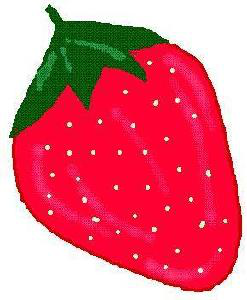

In [22]:
image = Image.open("PersonalTestSet/imagE_0018.jpg")
image

In [23]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [24]:
preprocessed_image = preprocess_img(image,target_size=(200,200))

In [25]:
predictions = model.predict_classes(preprocessed_image)
predictions

array([45], dtype=int64)